<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/hdbscan_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
!pip install hdbscan
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 19.8 MB/s eta 0:00:00


In [49]:
import hdbscan
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [4]:
# Generate sample data
X, y_true = make_blobs(n_samples=1000, centers=5,
                       cluster_std=0.6, random_state=42)

In [5]:
X_scaled = StandardScaler().fit_transform(X)

In [17]:
# Initialize HDBSCAN with additional parameters
cluster = hdbscan.HDBSCAN(min_cluster_size=5,
                            min_samples=5,
                            cluster_selection_method='eom',
                            allow_single_cluster=True,
                            metric='euclidean',
                            algorithm='best',
                            leaf_size=30)

In [18]:
# Fit the model to the data
cluster.fit(X_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


HDBSCAN(allow_single_cluster=True, leaf_size=30, min_samples=5)

In [19]:
# Evaluate clustering
labels = cluster.labels_
silhouette_avg = silhouette_score(X_scaled, labels)
ari = adjusted_rand_score(y_true, labels)

# Evaluation metrics
print("Silhouette Coefficient: {:.2f}".format(silhouette_avg))
print("Adjusted Rand Index: {:.2f}".format(ari))

Silhouette Coefficient: 0.78
Adjusted Rand Index: 0.99


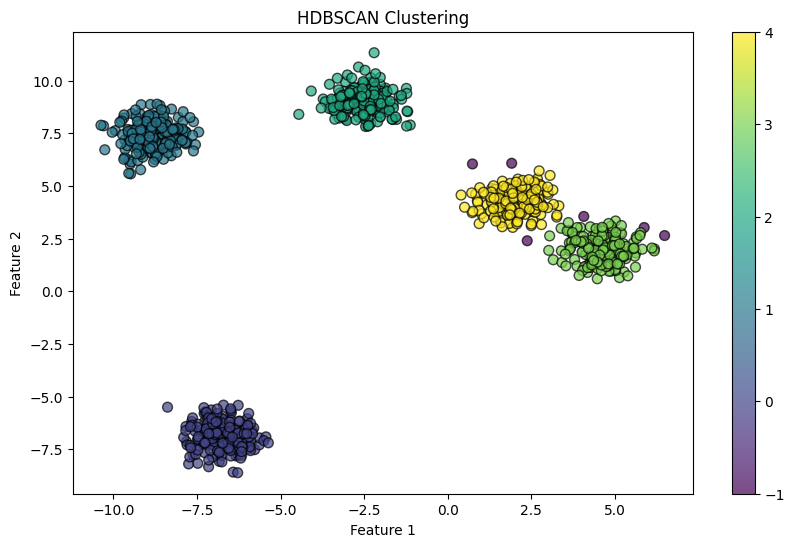

In [20]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_,
            cmap='viridis', s=50, alpha=0.7, edgecolors='k')
plt.colorbar()
plt.title('HDBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [14]:
df = pd.read_csv("sales.csv")
df.head()

,PROD_ID,TOTAL_SALES_AMOUNT,TOTAL_SALES_QTY
0,DCB205-2,150128084,1166795
1,DCK225D2,147205169,780539
2,DCF900P1,139021429,482357
3,DWE7491RS,131781912,247595
4,DCK240C2,131662506,725322


In [15]:
df.set_index('PROD_ID', inplace=True)
df['TOTAL_SALES_AMOUNT_SCALED'] = StandardScaler().fit_transform(df[['TOTAL_SALES_AMOUNT']])
df['TOTAL_SALES_QTY_SCALED'] = StandardScaler().fit_transform(df[['TOTAL_SALES_QTY']])
df.head()

,TOTAL_SALES_AMOUNT,TOTAL_SALES_QTY,TOTAL_SALES_AMOUNT_SCALED,TOTAL_SALES_QTY_SCALED
PROD_ID,,,,
DCB205-2,150128084,1166795,96.476900,2.830893
DCK225D2,147205169,780539,94.596867,1.878926
DCF900P1,139021429,482357,89.333045,1.144027
DWE7491RS,131781912,247595,84.676552,0.565433
DCK240C2,131662506,725322,84.599750,1.742839


In [45]:
sales_cluster = hdbscan.HDBSCAN(min_cluster_size=1000,
                            min_samples=100,
                            cluster_selection_method='leaf',
                            allow_single_cluster=False,
                            metric='euclidean',
                            algorithm='best',
                            leaf_size=100)

In [43]:
sales_scaled = df[['TOTAL_SALES_AMOUNT_SCALED',	'TOTAL_SALES_QTY_SCALED']].to_numpy()

In [46]:
sales_cluster.fit(sales_scaled)

# Evaluate clustering
labels = sales_cluster.labels_
silhouette_avg = silhouette_score(sales_scaled, labels)
#ari = adjusted_rand_score(y_true, labels)

# Evaluation metrics
print("Silhouette Coefficient: {:.2f}".format(silhouette_avg))
#print("Adjusted Rand Index: {:.2f}".format(ari))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Silhouette Coefficient: -0.66


<ipython-input-47-a2af2d7a39aa>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(sales_scaled[:, 0], sales_cluster.labels_,


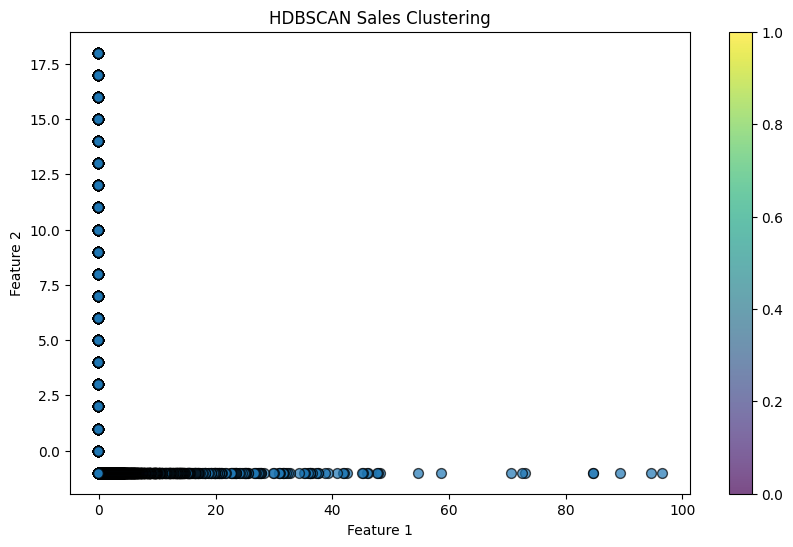

In [47]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(sales_scaled[:, 0], sales_cluster.labels_,
            cmap='viridis', s=50, alpha=0.7, edgecolors='k')
plt.colorbar()
plt.title('HDBSCAN Sales Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Cluster Centers:
 [[ 9.64452655e+01  9.45655457e+01  8.93032539e+01 ... -1.22118866e-01
  -1.23420468e-01 -1.31383127e-01]
 [ 9.64769001e+01  9.45968668e+01  8.93330451e+01 ... -1.22225696e-01
  -1.23445213e-01 -1.31431245e-01]
 [ 2.83089314e+00  1.87892649e+00  1.14402704e+00 ...  1.94017273e-01
  -5.01950420e-02  1.10108421e-02]
 [ 2.83698483e+00  1.88495780e+00  1.14976374e+00 ...  1.93996702e-01
  -5.01998069e-02  1.10015762e-02]
 [ 2.83089314e+00  1.87892649e+00  1.14402704e+00 ...  1.94017273e-01
  -5.01950420e-02  1.10108421e-02]]

Fuzzy Membership Matrix (first 5 data points):
 [[5.43404332e-22 4.93348759e-32]
 [1.00000000e+00 4.93015498e-32]
 [6.20112956e-29 9.99954228e-01]
 [6.20193641e-29 1.16510385e-23]
 [6.20112956e-29 4.57722158e-05]]


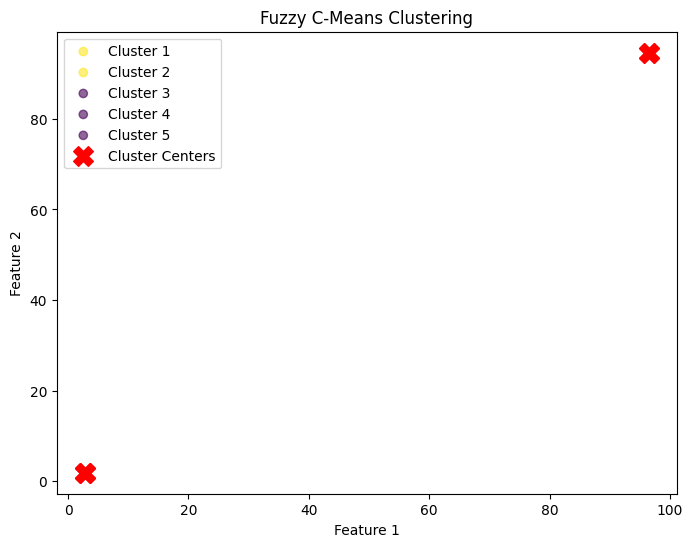

In [54]:
n_clusters = 5

cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
    sales_scaled, c=n_clusters, m=2, error=0.05, maxiter=1000, init=None
)

hard_clusters = np.argmax(u, axis=0)

print("Cluster Centers:\n", cntr)
print("\nFuzzy Membership Matrix (first 5 data points):\n", u[:, :5])

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(n_clusters):
    ax.scatter(sales_scaled[0], sales_scaled[1], c=u[i], alpha=0.6, label=f'Cluster {i+1}')

ax.scatter(cntr[:, 0], cntr[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

ax.set_title('Fuzzy C-Means Clustering')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend()
plt.show()

In [55]:
hard_clusters

array([1, 2])

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(sales_scaled[:, 0], sales_cluster.labels_,
            cmap='viridis', s=50, alpha=0.7, edgecolors='k')
plt.colorbar()
plt.title('HDBSCAN Sales Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()